<a href="https://colab.research.google.com/github/Sushant6862/Jeremy-Howard-Squadron-/blob/main/WeatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score

from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


pd.set_option('display.max_columns', None)



In [ ]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv")


In [ ]:
data.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
data.shape

(142193, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
data.isnull().sum()*100/len(data)

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

<Axes: >

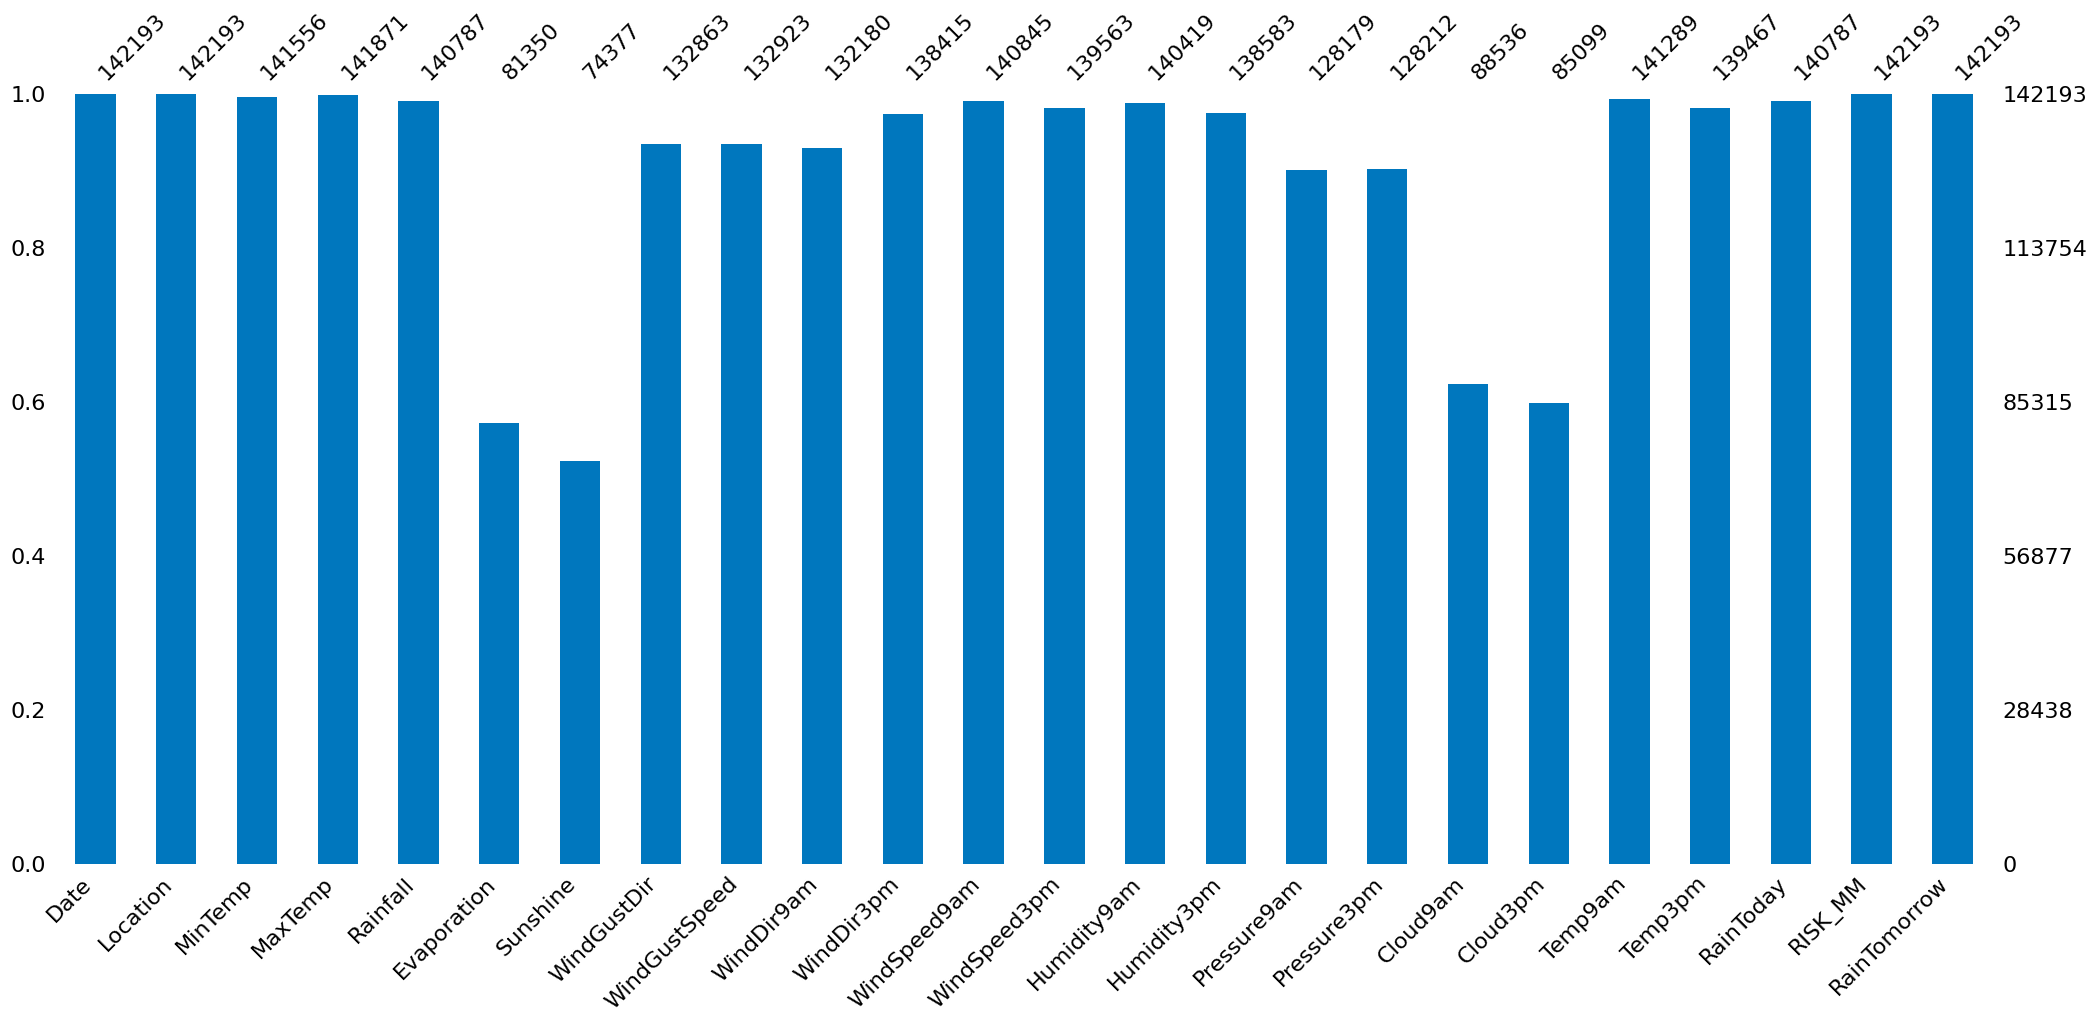

In [ ]:
msno.bar(data, color="#0077be")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])

In [ ]:
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())

<Axes: >

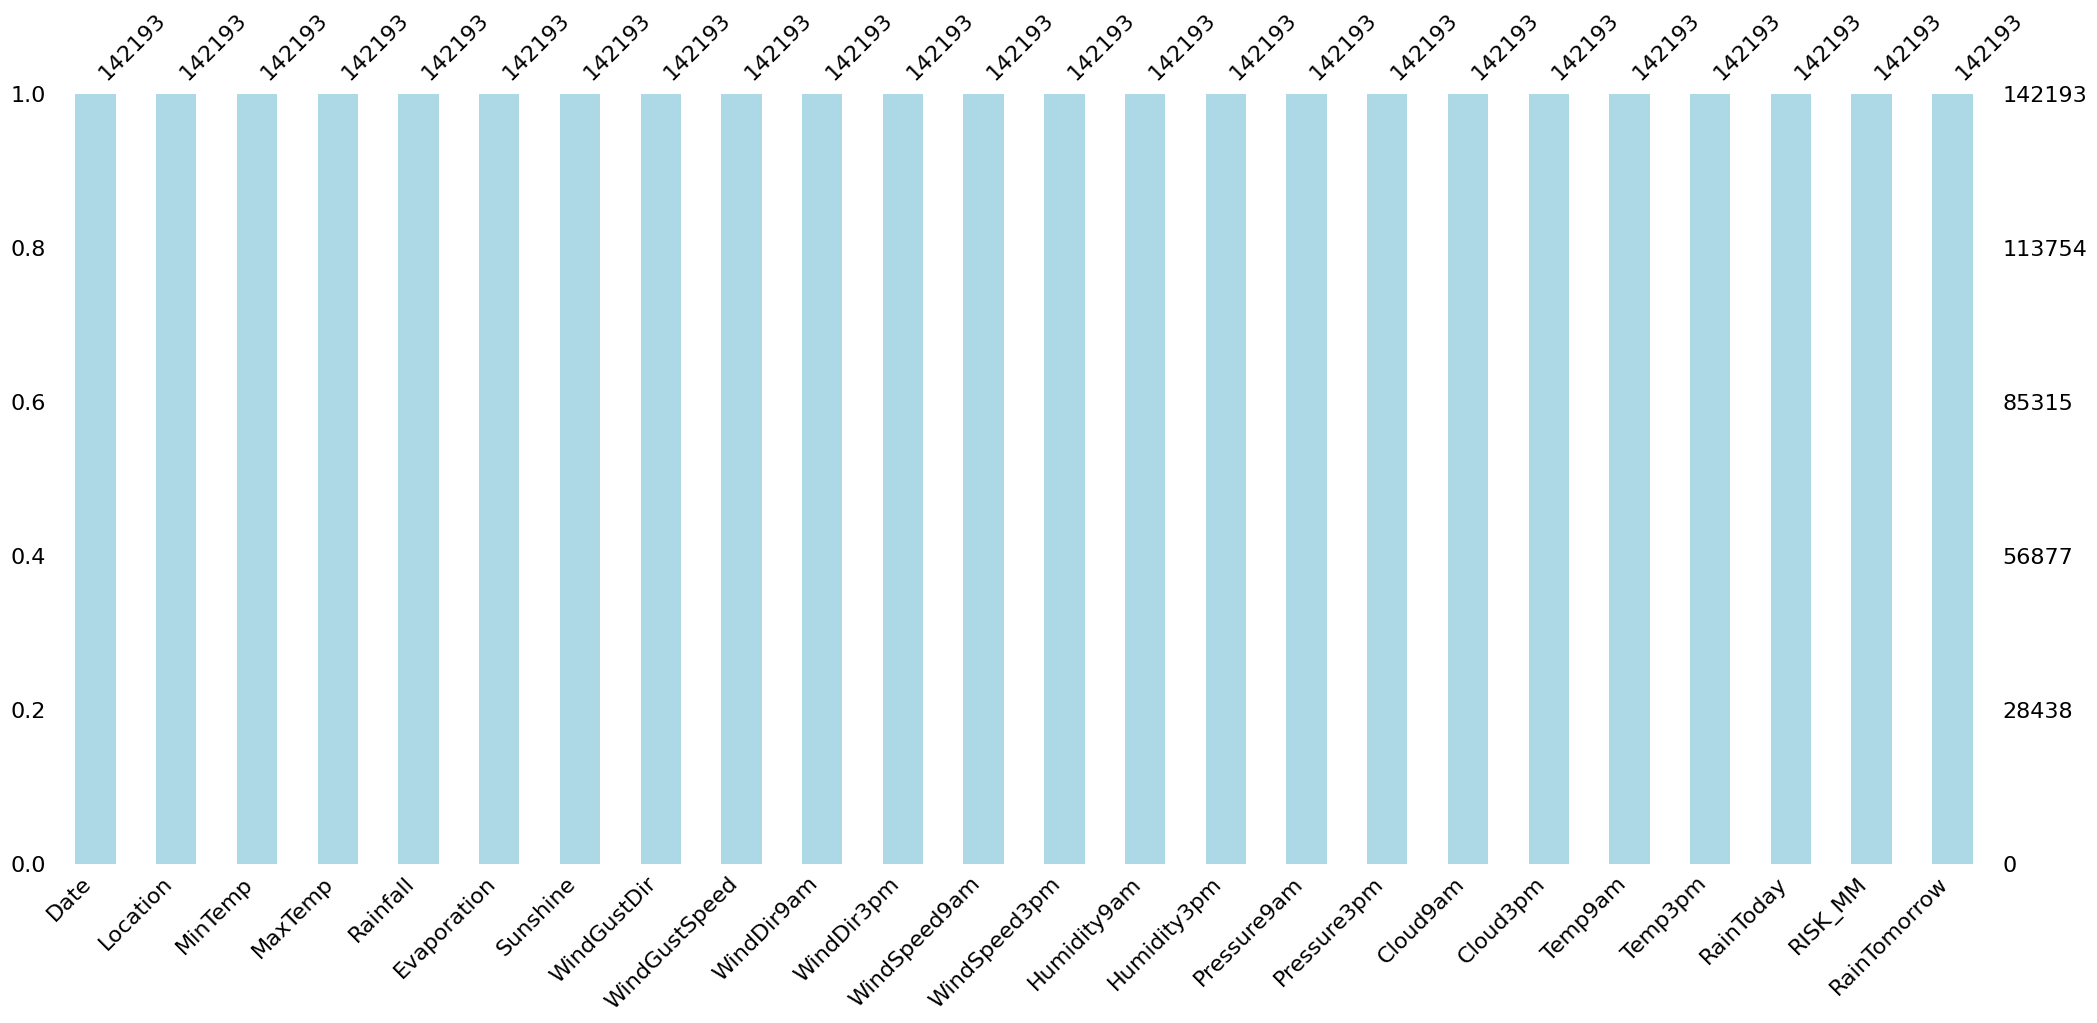

In [ ]:
msno.bar(data, color="lightblue")

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['WindGustDir'] = label_encoder.fit_transform(data['WindGustDir'])
data['WindDir9am'] = label_encoder.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = label_encoder.fit_transform(data['WindDir3pm'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['RainTomorrow'] = label_encoder.fit_transform(data['RainTomorrow'])
data['RainToday'] = label_encoder.fit_transform(data['RainToday'])

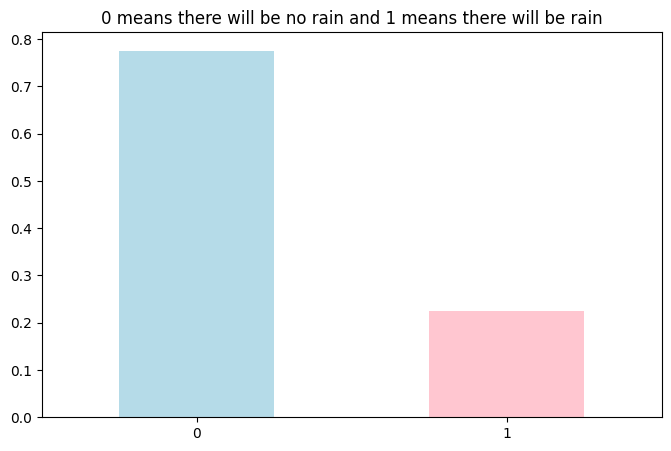

In [ ]:
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('0 means there will be no rain and 1 means there will be rain')
plt.show()

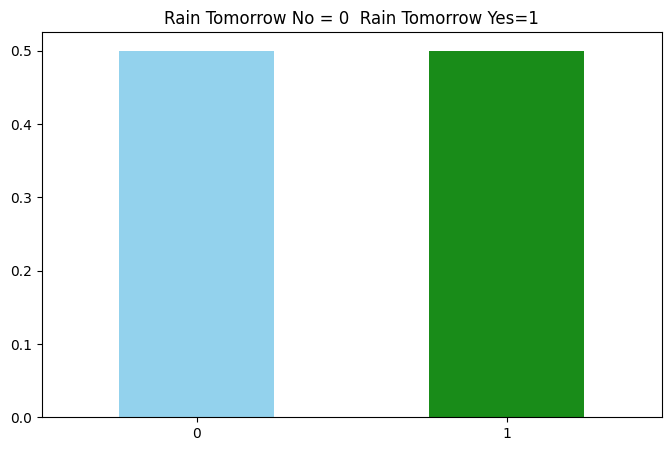

In [ ]:
no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
plt.title('Rain Tomorrow No = 0  Rain Tomorrow Yes=1')
plt.show()

In [ ]:
oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130416,2010-06-08,17,1.1,11.8,0.4,5.469824,7.624853,14,13.0,3,9,0.0,0.0,97.0,98.0,1020.1,1013.3,4.437189,4.503167,4.0,9.5,0,8.8,1
114384,2016-08-08,29,9.6,14.8,11.8,5.469824,4.300000,13,69.0,14,15,15.0,35.0,85.0,71.0,1015.4,1015.7,8.000000,8.000000,11.4,12.6,1,5.4,1
84962,2009-03-18,8,24.8,31.5,0.0,5.400000,3.400000,9,48.0,10,2,19.0,28.0,63.0,60.0,1008.6,1006.2,5.000000,6.000000,28.7,30.3,0,9.8,1
54992,2012-08-17,5,4.2,7.9,11.4,5.469824,7.624853,12,63.0,6,11,20.0,19.0,99.0,93.0,997.2,998.9,8.000000,8.000000,4.6,6.8,1,18.4,1


In [ ]:
def data_split(data):
  X = data.drop([ "Date","RainTomorrow"], axis=1)
  Y = data["RainTomorrow"]
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, stratify = Y, random_state = 0)


  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test= data_split(data)


In [ ]:
def model_training(X_train, X_test, y_train, y_test):

  model = lgb.LGBMClassifier()
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)

  accuracy=accuracy_score(y_pred, y_test)

  print('LightGBM model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))
  return accuracy,model
  print("Accuracy:", accuracy)


In [ ]:
accuracy,model=model_training(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 22314, number of negative: 77221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2899
[LightGBM] [Info] Number of data points in the train set: 99535, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224182 -> initscore=-1.241457
[LightGBM] [Info] Start training from score -1.241457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
print(accuracy)

1.0


In [ ]:
# plt.figure(figsize=(30,20))
# sns.heatmap(data.corr().abs(),  annot=True)

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

residuals_train = y_train-y_pred_train
residuals_test = y_test-y_pred_test

mean_residuals_train= np.mean(residuals_train)
mean_residuals_test= np.mean(residuals_test)

print(mean_residuals_train)
print(mean_residuals_test)


0.0
0.0


In [ ]:
def Mean_of_Residuals(X_train, X_test, y_train, y_test,model):

  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)

  residuals_train = y_train-y_pred_train
  residuals_test = y_test-y_pred_test

  mean_residuals_train= np.mean(residuals_train)
  mean_residuals_test= np.mean(residuals_test)

  print(mean_residuals_train)
  print(mean_residuals_test)

  return mean_residuals_train
  # print("Mean of Residuals {}".format(mean_residuals))


In [ ]:
Mean_of_Residuals(X_train, X_test, y_train, y_test,model)

0.0
0.0


0.0

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def Confusion_Matrix(y_test, y_pred_test):
  cm = confusion_matrix(y_test, y_pred_test)
  print('Confusion matrix\n\n', cm)

  print('\nTrue Positives(TP) = ', cm[0,0])

  print('\nTrue Negatives(TN) = ', cm[1,1])

  print('\nFalse Positives(FP) = ', cm[0,1])

  print('\nFalse Negatives(FN) = ', cm[1,0])

  return cm


In [ ]:
 CM= Confusion_Matrix(y_test, y_pred_test)

Confusion matrix

 [[33095     0]
 [    0  9563]]

True Positives(TP) =  33095

True Negatives(TN) =  9563

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
# visualize confusion matrix with seaborn heatmap

def Visualize_Confusion_Matrix(CM):
  cm_matrix = pd.DataFrame(data=CM, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')




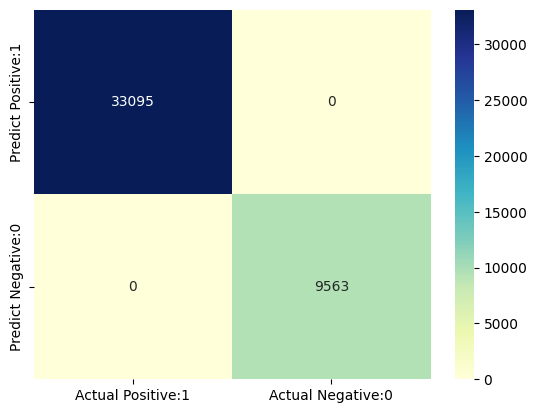

In [ ]:
Visualize_Confusion_Matrix(CM)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33095
           1       1.00      1.00      1.00      9563

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



## Classification Accuracy

In [ ]:
TP = CM[0,0]
TN = CM[1,1]
FP = CM[0,1]
FN = CM[1,0]

In [ ]:
# print classification accuracy

def classification_accuracy(CM):
  classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

  print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))



In [ ]:
classification_accuracy(CM)

Classification accuracy : 1.0000


In [ ]:
# print classification error
def classification_error(CM):
  classification_error = (FP + FN) / float(TP + TN + FP + FN)

  print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
classification_error(CM)

Classification error : 0.0000


In [ ]:
# print precision score
def precision_score(CM):
  precision = TP / float(TP + FP)
  print('Precision : {0:0.4f}'.format(precision))


In [ ]:
precision_score(CM)

Precision : 1.0000


In [ ]:
# Recall
def recall(CM):
  recall = TP / float(TP + FN)

  print('Recall or Sensitivity : {0:0.4f}'.format(recall))



In [ ]:
recall(CM)

Recall or Sensitivity : 1.0000
